In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
%matplotlib inline

In [45]:
alpha = 0.5
beta = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0 = 0
tf = 25


def build_plot(ts, ys):
    interpolated = interp1d(ts, ys)
    more_ts = np.linspace(t0, tf, 1000)
    plt.plot(more_ts, interpolated(more_ts))
    plt.grid()
    plt.show()

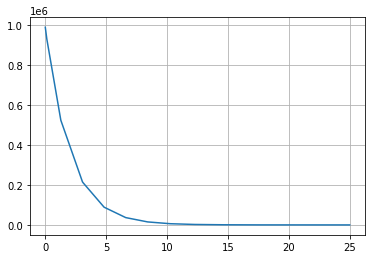

In [46]:
def dsdt(t, s):
    return (-1 * alpha) * s


susceptible = solve_ivp(dsdt, (t0, tf), [S0], dense_output=True)
ts, ys = susceptible.t, susceptible.y[0]
build_plot(ts, ys)

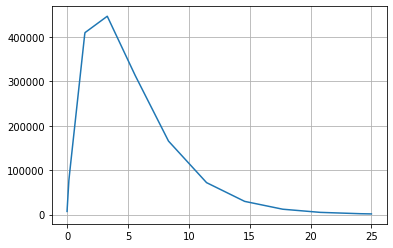

In [47]:
def didt(t, i):
    return alpha*susceptible.sol(t) - beta * i


infected = solve_ivp(didt, (t0, tf), [I0], dense_output=True)
ts, ys = infected.t, infected.y[0]
build_plot(ts, ys)

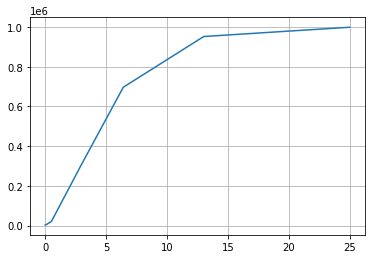

In [48]:
def drdt(t, r):
    return beta * infected.sol(t)


recovered = solve_ivp(drdt, (t0, tf), [R0])
ts, ys = recovered.t, recovered.y[0]
build_plot(ts, ys)

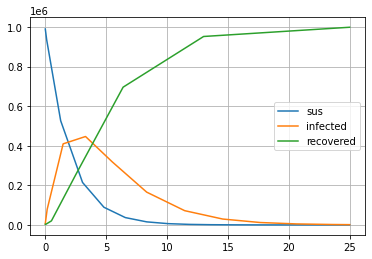

In [49]:
plt.plot(susceptible.t, susceptible.y[0], label="sus")
plt.plot(infected.t, infected.y[0], label="infected")
plt.plot(recovered.t, recovered.y[0], label="recovered")
plt.legend()
plt.grid()
plt.show()